# Mars Craters Study

In this study on crates on Mars we are trying to find an aswer to followin questions: 
- Are the craters equally distributed on the surface of the Mars? 
- Is the depth or diameter of the crater dependent on the location, that is, longitude and/or latitude? 

The first question is pretty much solved, as can be seen below, but the another question is not solved yet. 

Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 

from IPython.display import Image
from IPython.core.display import HTML 

#show all columns
pd.set_option('display.max_columns', None)

Read in data. Data can be downloaded from http://craters.sjrdesign.net/ 

In [2]:
data_orig = pd.read_csv('RobbinsCraters_20121016.tsv',sep='\t',low_memory=False)
data_orig.head()

,CRATER_ID,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,LATITUDE_ELLIPSE_IMAGE,LONGITUDE_ELLIPSE_IMAGE,DIAM_CIRCLE_IMAGE,DIAM_CIRCLE_SD_IMAGE,DIAM_ELLIPSE_MAJOR_IMAGE,DIAM_ELLIPSE_MINOR_IMAGE,DIAM_ELLIPSE_ECCEN_IMAGE,DIAM_ELLIPSE_ELLIP_IMAGE,DIAM_ELLIPSE_ANGLE_IMAGE,LATITUDE_CIRCLE_TOPOG,LONGITUDE_CIRCLE_TOPOG,DIAM_CIRCLE_TOPOG,DIAM_CIRCLE_SD_TOPOG,DEPTH_RIM_TOPOG,DEPTH_RIM_SD_TOPOG,DEPTH_SURFACE_TOPOG,DEPTH_SURFACE_SD_TOPOG,DEPTH_FLOOR_TOPOG,DEPTH_FLOOR_SD_TOPOG,DEPTH_RIMFLOOR_TOPOG,DEPTH_RIMHEIGHT_TOPOG,DEPTH_SURFFLOOR_TOPOG,PTS_USED_RIM_IMAGE,PTS_USED_RIM_TOPOG,PTS_USED_SURFACE,PTS_USED_FLOOR,PTS_USED_LOBE_1,PTS_USED_LOBE_2,PTS_USED_LOBE_3,PTS_USED_LOBE_4,PTS_USED_LOBE_5,NUMBER_LOBES,MORPHOLOGY_CRATER_1,MORPHOLOGY_CRATER_2,MORPHOLOGY_CRATER_3,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,MORPHOLOGY_EJECTA_COMMENTS,DEGRADATION_STATE,CONFIDENCE_IMPACT_CRATER,LAYER_1_PERIMETER,LAYER_1_AREA,LAYER_1_LOBATENESS,LAYER_1_EJECTARAD_EQUIV,LAYER_1_EJECTARAD_REL,LAYER_2_PERIMETER,LAYER_2_AREA,LAYER_2_LOBATENESS,LAYER_2_EJECTARAD_EQUIV,LAYER_2_EJECTARAD_REL,LAYER_3_PERIMETER,LAYER_3_AREA,LAYER_3_LOBATENESS,LAYER_3_EJECTARAD_EQUIV,LAYER_3_EJECTARAD_REL,LAYER_4_PERIMETER,LAYER_4_AREA,LAYER_4_LOBATENESS,LAYER_4_EJECTARAD_EQUIV,LAYER_4_EJECTARAD_REL,LAYER_5_PERIMETER,LAYER_5_AREA,LAYER_5_LOBATENESS,LAYER_5_EJECTARAD_EQUIV,LAYER_5_EJECTARAD_REL,CRATER_NAME
0,01-000000,84.367,108.746,84.750,108.663,82.10,0.26,82.97,69.43,0.55,1.20,-34.0,84.511,107.904,79.84,1.01,-3.36,0.21,-3.57,0.39,-3.59,0.17,0.22,0.21,0.02,275,79.0,222.0,138.0,NaN,NaN,NaN,NaN,NaN,NaN,CpxUnc,NaN,Floor Deposits,NaN,NaN,NaN,NaN,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-000001,72.760,164.464,72.784,164.464,82.02,0.09,84.17,79.91,0.31,1.05,44.0,72.769,164.542,82.02,7.76,-3.82,0.26,-4.66,0.09,-5.79,0.32,1.97,0.83,1.14,977,107.0,267.0,53.0,NaN,NaN,NaN,NaN,NaN,3.0,CpxUnc,Terraced,Slump Deposits / Floor Deposits,Rd/MLERS,HuBL,NaN,NaN,3.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Korolev
2,01-000002,69.244,-27.240,69.241,-27.235,79.63,NaN,84.36,75.28,0.45,1.12,-23.0,69.237,-27.622,83.22,7.99,-5.15,0.03,-5.16,0.03,-5.25,0.02,0.09,0.01,0.08,435,126.0,194.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,CpxUnc,NaN,Floor Deposits / Ejecta Deposits,NaN,NaN,NaN,NaN,1.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-000003,70.107,160.575,70.151,160.575,74.81,0.05,75.12,74.58,0.12,1.01,99.0,70.111,160.583,76.22,5.13,-4.51,0.04,-4.49,0.05,-4.64,0.02,0.13,-0.02,0.15,370,168.0,237.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,CpxFF,NaN,Floor Deposits / Ejecta Deposits,NaN,NaN,NaN,NaN,1.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-000004,77.996,95.617,77.998,95.615,73.53,0.23,77.28,70.13,0.42,1.10,-8.0,77.965,95.889,69.21,4.97,-4.40,0.04,-4.40,0.05,-4.50,0.01,0.11,0.00,0.10,422,180.0,184.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,CpxFF,NaN,Floor Deposits,NaN,NaN,NaN,NaN,1.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_orig.describe()

,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,LATITUDE_ELLIPSE_IMAGE,LONGITUDE_ELLIPSE_IMAGE,DIAM_CIRCLE_IMAGE,DIAM_CIRCLE_SD_IMAGE,DIAM_ELLIPSE_MAJOR_IMAGE,DIAM_ELLIPSE_MINOR_IMAGE,DIAM_ELLIPSE_ECCEN_IMAGE,DIAM_ELLIPSE_ELLIP_IMAGE,DIAM_ELLIPSE_ANGLE_IMAGE,LATITUDE_CIRCLE_TOPOG,LONGITUDE_CIRCLE_TOPOG,DIAM_CIRCLE_TOPOG,DIAM_CIRCLE_SD_TOPOG,DEPTH_RIM_TOPOG,DEPTH_RIM_SD_TOPOG,DEPTH_SURFACE_TOPOG,DEPTH_SURFACE_SD_TOPOG,DEPTH_FLOOR_TOPOG,DEPTH_FLOOR_SD_TOPOG,DEPTH_RIMFLOOR_TOPOG,DEPTH_RIMHEIGHT_TOPOG,DEPTH_SURFFLOOR_TOPOG,PTS_USED_RIM_IMAGE,PTS_USED_RIM_TOPOG,PTS_USED_SURFACE,PTS_USED_FLOOR,PTS_USED_LOBE_1,PTS_USED_LOBE_2,PTS_USED_LOBE_3,PTS_USED_LOBE_4,PTS_USED_LOBE_5,NUMBER_LOBES,DEGRADATION_STATE,CONFIDENCE_IMPACT_CRATER,LAYER_1_PERIMETER,LAYER_1_AREA,LAYER_1_LOBATENESS,LAYER_1_EJECTARAD_EQUIV,LAYER_1_EJECTARAD_REL,LAYER_2_PERIMETER,LAYER_2_AREA,LAYER_2_LOBATENESS,LAYER_2_EJECTARAD_EQUIV,LAYER_2_EJECTARAD_REL,LAYER_3_PERIMETER,LAYER_3_AREA,LAYER_3_LOBATENESS,LAYER_3_EJECTARAD_EQUIV,LAYER_3_EJECTARAD_REL,LAYER_4_PERIMETER,LAYER_4_AREA,LAYER_4_LOBATENESS,LAYER_4_EJECTARAD_EQUIV,LAYER_4_EJECTARAD_REL,LAYER_5_PERIMETER,LAYER_5_AREA,LAYER_5_LOBATENESS,LAYER_5_EJECTARAD_EQUIV,LAYER_5_EJECTARAD_REL
count,384345.000000,384345.000000,384336.000000,384336.000000,384345.000000,368060.000000,384336.000000,384336.000000,384336.000000,384336.000000,384337.000000,76745.000000,76745.000000,76745.000000,7.322600e+04,76868.000000,76868.000000,76868.000000,76868.000000,76868.000000,76868.000000,76868.000000,76868.000000,76868.000000,384345.000000,76873.000000,78805.000000,76970.000000,13673.000000,1871.000000,223.000000,21.000000,1.0,19731.000000,74085.000000,384345.000000,13672.000000,13672.000000,13672.000000,13672.000000,13672.00000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,223.000000,223.000000,223.000000,223.000000,223.000000,21.000000,21.000000,21.000000,21.000000,21.000000,1.00,1.00,1.00,1.00,1.00
mean,-7.199344,10.128162,-7.200555,10.128915,3.556673,0.035189,3.727530,3.378996,0.424874,1.130761,36.021114,-9.938633,13.032614,11.230702,2.564188e+08,0.198974,0.071432,0.105122,0.114583,-0.180247,0.019601,0.379191,0.093820,0.285373,25.562786,46.453605,101.408096,29.098610,151.872742,341.046499,662.775785,879.523810,2562.0,1.262936,2.069137,3.994544,74.656484,211.505881,1.448286,4.382903,1.36478,167.684949,776.483089,1.730989,9.971513,2.385430,335.882197,2248.889103,2.027982,17.967982,2.588969,439.282857,3641.935714,2.071429,23.490000,2.344286,1293.59,23217.31,2.34,69.73,3.85
std,33.608932,96.641733,33.607636,96.641866,8.591972,0.033566,8.852149,8.071147,0.134485,0.122023,50.845572,33.636631,93.926668,15.481518,4.738570e+10,2.222266,0.083566,2.214142,0.140358,2.210117,0.020854,0.361005,0.129159,0.312722,44.356931,37.468384,54.268809,33.199407,120.477686,221.943999,371.855057,467.642451,NaN,0.545538,1.007342,0.103580,59.519068,492.753099,0.256699,2.900608,0.52585,111.706999,917.005572,0.345026,5.388432,0.927065,188.608656,2269.623713,0.483276,8.328335,1.254946,189.348267,3085.289562,0.291415,9.677799,0.448125,NaN,NaN,NaN,NaN,NaN
min,-86.700000,-179.997000,-86.700000,-179.996000,1.000000,0.000000,1.000000,0.540000,0.020000,1.000000,-179.000000,-86.725000,-179.997000,1.030000,3.000000e-02,-7.570000,0.000000,-7.590000,0.000000,-8.150000,0.000000,-0.420000,-1.120000,-1.620000,5.000000,4.000000,8.000000,2.000000,17.000000,44.000000,93.000000,400.000000,2562.0,1.000000,1.000000,0.000000,7.800000,0.200000,1.010000,0.020000,0.01000,20.480000,22.400000,1.060000,1.820000,0.630000,43.350000,81.550000,1.200000,3.800000,1.080000,211.180000,979.090000,1.440000,12.180000,1.710000,1293.59,23217.31,2.34,69.73,3.85
25%,-30.935000,-58.830000,-30.936000,-58.830250,1.180000,0.020000,1.260000,1.110000,0.330000,1.060000,-6.000000,-34.636000,-48.000000,3.750000,4.400000e-01,-1.370000,0.030000,-1.460000,0.030000,-1.760000,0.010000,0.120000,0.020000,0.070000,11.000000,12.000000,57.000000,6.000000,76.000000,178.000000,406.500000,537.000000,2562.0,1.000000,

Leave only relevant data; leave out layer data from the end of the table, but take also the names of the craters from the end. 

In [4]:
#data = data_orig[['CRATER_NAME','LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE',
#                 'DIAM_CIRCLE_IMAGE','DEPTH_RIMFLOOR_TOPOG', 'NUMBER_LAYERS']]
data = data_orig.iloc[:,0:44]
data['CRATER_NAME'] = data_orig['CRATER_NAME']
data.head()

,CRATER_ID,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,LATITUDE_ELLIPSE_IMAGE,LONGITUDE_ELLIPSE_IMAGE,DIAM_CIRCLE_IMAGE,DIAM_CIRCLE_SD_IMAGE,DIAM_ELLIPSE_MAJOR_IMAGE,DIAM_ELLIPSE_MINOR_IMAGE,DIAM_ELLIPSE_ECCEN_IMAGE,DIAM_ELLIPSE_ELLIP_IMAGE,DIAM_ELLIPSE_ANGLE_IMAGE,LATITUDE_CIRCLE_TOPOG,LONGITUDE_CIRCLE_TOPOG,DIAM_CIRCLE_TOPOG,DIAM_CIRCLE_SD_TOPOG,DEPTH_RIM_TOPOG,DEPTH_RIM_SD_TOPOG,DEPTH_SURFACE_TOPOG,DEPTH_SURFACE_SD_TOPOG,DEPTH_FLOOR_TOPOG,DEPTH_FLOOR_SD_TOPOG,DEPTH_RIMFLOOR_TOPOG,DEPTH_RIMHEIGHT_TOPOG,DEPTH_SURFFLOOR_TOPOG,PTS_USED_RIM_IMAGE,PTS_USED_RIM_TOPOG,PTS_USED_SURFACE,PTS_USED_FLOOR,PTS_USED_LOBE_1,PTS_USED_LOBE_2,PTS_USED_LOBE_3,PTS_USED_LOBE_4,PTS_USED_LOBE_5,NUMBER_LOBES,MORPHOLOGY_CRATER_1,MORPHOLOGY_CRATER_2,MORPHOLOGY_CRATER_3,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,MORPHOLOGY_EJECTA_COMMENTS,DEGRADATION_STATE,CONFIDENCE_IMPACT_CRATER,CRATER_NAME
0,01-000000,84.367,108.746,84.750,108.663,82.10,0.26,82.97,69.43,0.55,1.20,-34.0,84.511,107.904,79.84,1.01,-3.36,0.21,-3.57,0.39,-3.59,0.17,0.22,0.21,0.02,275,79.0,222.0,138.0,NaN,NaN,NaN,NaN,NaN,NaN,CpxUnc,NaN,Floor Deposits,NaN,NaN,NaN,NaN,1.0,3,NaN
1,01-000001,72.760,164.464,72.784,164.464,82.02,0.09,84.17,79.91,0.31,1.05,44.0,72.769,164.542,82.02,7.76,-3.82,0.26,-4.66,0.09,-5.79,0.32,1.97,0.83,1.14,977,107.0,267.0,53.0,NaN,NaN,NaN,NaN,NaN,3.0,CpxUnc,Terraced,Slump Deposits / Floor Deposits,Rd/MLERS,HuBL,NaN,NaN,3.0,4,Korolev
2,01-000002,69.244,-27.240,69.241,-27.235,79.63,NaN,84.36,75.28,0.45,1.12,-23.0,69.237,-27.622,83.22,7.99,-5.15,0.03,-5.16,0.03,-5.25,0.02,0.09,0.01,0.08,435,126.0,194.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,CpxUnc,NaN,Floor Deposits / Ejecta Deposits,NaN,NaN,NaN,NaN,1.0,4,NaN
3,01-000003,70.107,160.575,70.151,160.575,74.81,0.05,75.12,74.58,0.12,1.01,99.0,70.111,160.583,76.22,5.13,-4.51,0.04,-4.49,0.05,-4.64,0.02,0.13,-0.02,0.15,370,168.0,237.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,CpxFF,NaN,Floor Deposits / Ejecta Deposits,NaN,NaN,NaN,NaN,1.0,4,NaN
4,01-000004,77.996,95.617,77.998,95.615,73.53,0.23,77.28,70.13,0.42,1.10,-8.0,77.965,95.889,69.21,4.97,-4.40,0.04,-4.40,0.05,-4.50,0.01,0.11,0.00,0.10,422,180.0,184.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,CpxFF,NaN,Floor Deposits,NaN,NaN,NaN,NaN,1.0,4,NaN


New column; has crater given a name

In [5]:
def isCaterNamed(row):
    # no name given 
    #if np.isnan(row['CRATER_NAME']) :
    if type(row['CRATER_NAME']) != str :
      val = 0
    else : # name is given 
      val = 1
    return val

#data_sub['IS_NAMED'] = data_sub.apply(lambda row: isCaterNamed(row),axis=1)
data['IS_NAMED'] = data.apply(isCaterNamed, axis=1)

### Plotting the crater data 

Source 
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html  

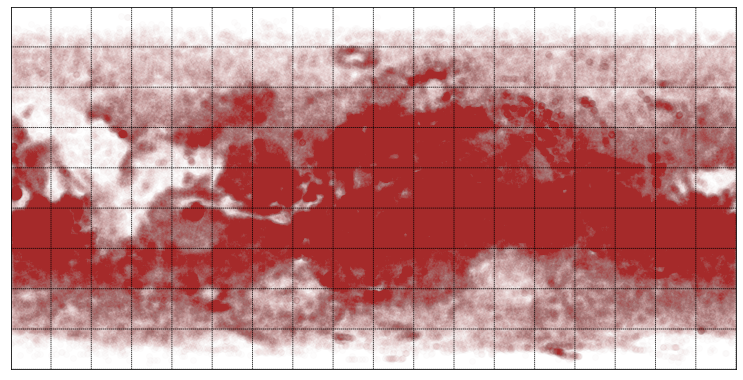

In [6]:
# Create empty background for the map
fig = plt.figure(figsize=(13, 8))
m = Basemap(projection='cyl', resolution=None,
            lat_0=0, lon_0=0)
# Plot grid 
m.drawparallels(range(-90, 90, 20))
m.drawmeridians(range(-180, 180, 20))

# Plot location data on the map
m.scatter(data['LONGITUDE_CIRCLE_IMAGE'], data['LATITUDE_CIRCLE_IMAGE'], 
          latlon=True, color='brown', alpha=0.01);

The darker the area is, the more craters there are in that area. There seems to be more craters near the equator than near the poles, and the distribution of the craters is not equal in longitudes either. 

We can compare this image to topographic map of Mars (NASA / JPL / USGS): 

![Image](https://upload.wikimedia.org/wikipedia/commons/2/2c/Mars_topography_%28MOLA_dataset%29_with_poles_HiRes.jpg) 

### Studying the crater data 

Plotting histograms to get more scientific idea about the crater distribution. 

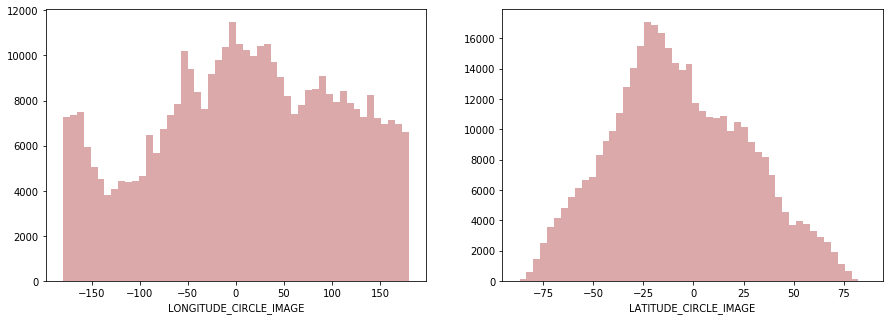

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
seaborn.distplot(data['LONGITUDE_CIRCLE_IMAGE'], kde=None, color='brown', ax=axs[0])
seaborn.distplot(data['LATITUDE_CIRCLE_IMAGE'], kde=None, color='brown', ax=axs[1]);

Note that if the craters would be distributed equally troughout the surface of the Mars, the longitude histogram should have quite a flat appearance. The same does not apply to latitude, as the surface area covered by a degree of change gets smaller when getting closer to the polar regions. 

#### Transforming latitudes and longitudes to categories 
To overcome this drawback, we can divide the surface of Mars to equal areas by latitude. Lets do that by dividing surface to eight areas by equal sizes by latitude.  

Source: https://notmatthancock.github.io/2017/12/26/regular-area-sphere-partitioning.html

In [8]:
m = 4  # number of divisions in northern & southern hemispheres 
       # total number of categories = 2*m
r = 1.0 # radius of the sphere 

#longitudes
theta,delta_theta = np.linspace(0, 2*np.pi, 2*m+1, retstep=True)
delta_S = delta_theta / m

#latitudes
phi = 1-np.arange(2*m+1) * delta_S / (r**2 * delta_theta) 
phi = np.arccos(phi)

Plot for checking the reasonability of the code above. Areas defined by rectangles closer to the equator are shorter and wider than closer to poles to maintain equal area. 

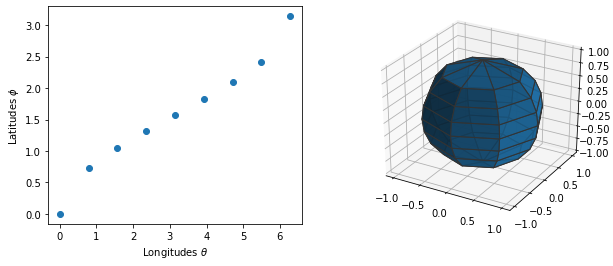

In [9]:
from mpl_toolkits.mplot3d import Axes3D

t,p = np.meshgrid(theta,phi)

x = r*np.cos(t)*np.sin(p)
y = r*np.sin(t)*np.sin(p)
z = r*np.cos(p)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

ax1.plot(theta, phi, 'o')
ax1.set_xlabel("Longitudes $\\theta$")
ax1.set_ylabel("Latitudes $\\phi$")

ax2.plot_surface(x,y,z, edgecolors='0.2', alpha = 0.85);

Convert obtained longitude and latitude radii to degrees and scale appropriately. 

In [10]:
theta = theta * 180 / np.pi - 180  # scale longitudes to [-180,180] deg
phi = phi * 180 / np.pi - 90       # scale latitudes to [-90,90] deg
phi

array([-90.        , -48.59037789, -30.        , -14.47751219,
         0.        ,  14.47751219,  30.        ,  48.59037789,
        90.        ])

Split Longitude to 8 categories: 

In [11]:
labels_long=["-180:-135", "-135:-90", "-90:-45" ,"-45:0", 
             "0:45", "45:90", "90:135", "135:180"]
data['LONGITUDE_CATEGORY'] = pd.cut(data.LONGITUDE_CIRCLE_IMAGE, bins = theta, 
                                    labels=labels_long)

Split Latitude to 8 categories: 

In [12]:
labels_lat=["-90:-48.6", "-48.6:-30" ,"-30:-14.5", "-14.5:0", 
            "0:14.5", "14.5:30","30:48.6", "48.6:90"]
data['LATITUDE_CATEGORY'] = pd.cut(data.LATITUDE_CIRCLE_IMAGE, bins = phi, 
                                   labels=labels_lat)

#### Crater distribution by longitude and latitude categories 

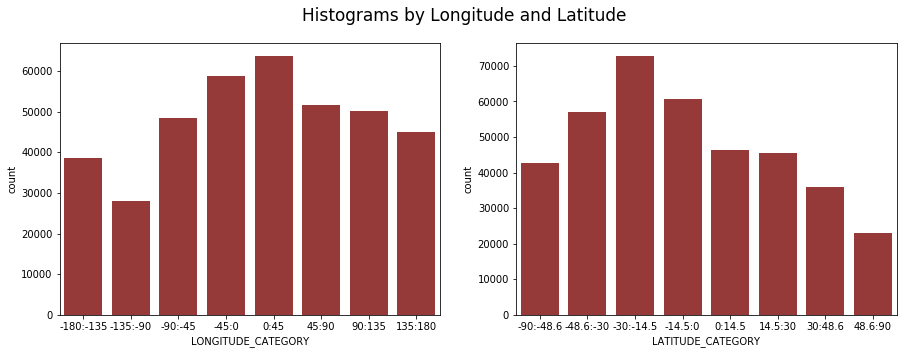

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
seaborn.catplot(x='LONGITUDE_CATEGORY', data=data, kind="count", 
                ci=None, color='brown', ax=axs[0])

seaborn.catplot(x='LATITUDE_CATEGORY', data=data, kind="count", 
                ci=None, color='brown', ax=axs[1])
fig.suptitle('Histograms by Longitude and Latitude', size=17)
plt.close(2);plt.close(3); #remove extra axis from plot

We can see that the histogram of the longitude  is similar as the histogram we plotted earlier, as it should, as the only transformation we have done is to split it to fewer categories. 

The latitude has been transformed slightly, as it should, but still it is not a flat plot, so we can deduce that the craters actually are more concentrated to the latitudes around the equator, and which is even more interesting, the southern latitudes have more craters than northern latitudes, but this only confirms the fact we were able to see from the plot where the locations of all the craters were plotted. 